<h1 style=" text-align: right; display: inline;">POTENTIA Mid-year Workshop Project </h1>

## Data Explanation
The file has information about the Weekly Sales of 45 stores for the year 2010-2012 including the factors affectors affecting Sales such as Holidays, Temperature, Fuel Price, CPI, and Unemployment.

Within the Dataset file, following fields are present:
1. Store - the store number
2. Date - the week of sales
3. Weekly_Sales - sales for the given store
4. Holiday_Flag - whether the week is a holiday week 1 – Holiday week 0 – Non-holiday week
5. Temperature - Temperature on the day of sale
6. Fuel_Price - Cost of fuel in the region
7. CPI – Prevailing consumer price index
8. Unemployment - Prevailing unemployment rate



# Our Goal session 1
**1:Data Wrangling<br> 2: Explore the Data <br> 3: Check for stationarity<br>4: Decomposition<br>5: Correlation & Autocorrelation**


### Import Libraries

In [135]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [136]:
# Read Data
data = pd.read_csv('data.csv')

In [137]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [138]:
#check data shape
data.shape

(6435, 8)

# Exploring the data

In [139]:
#get basic information on data
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [140]:
#show first 5 elements in data
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [141]:
#Change date type to datetime
data['Date']=pd.to_datetime(data['Date'],dayfirst=True)

In [142]:
#separate date into 3 seperate columns
data['Year'] = pd.DatetimeIndex(data.Date).year
data['Month']=pd.DatetimeIndex(data.Date).month
data['Day']=pd.DatetimeIndex(data.Date).day

# Visualize data

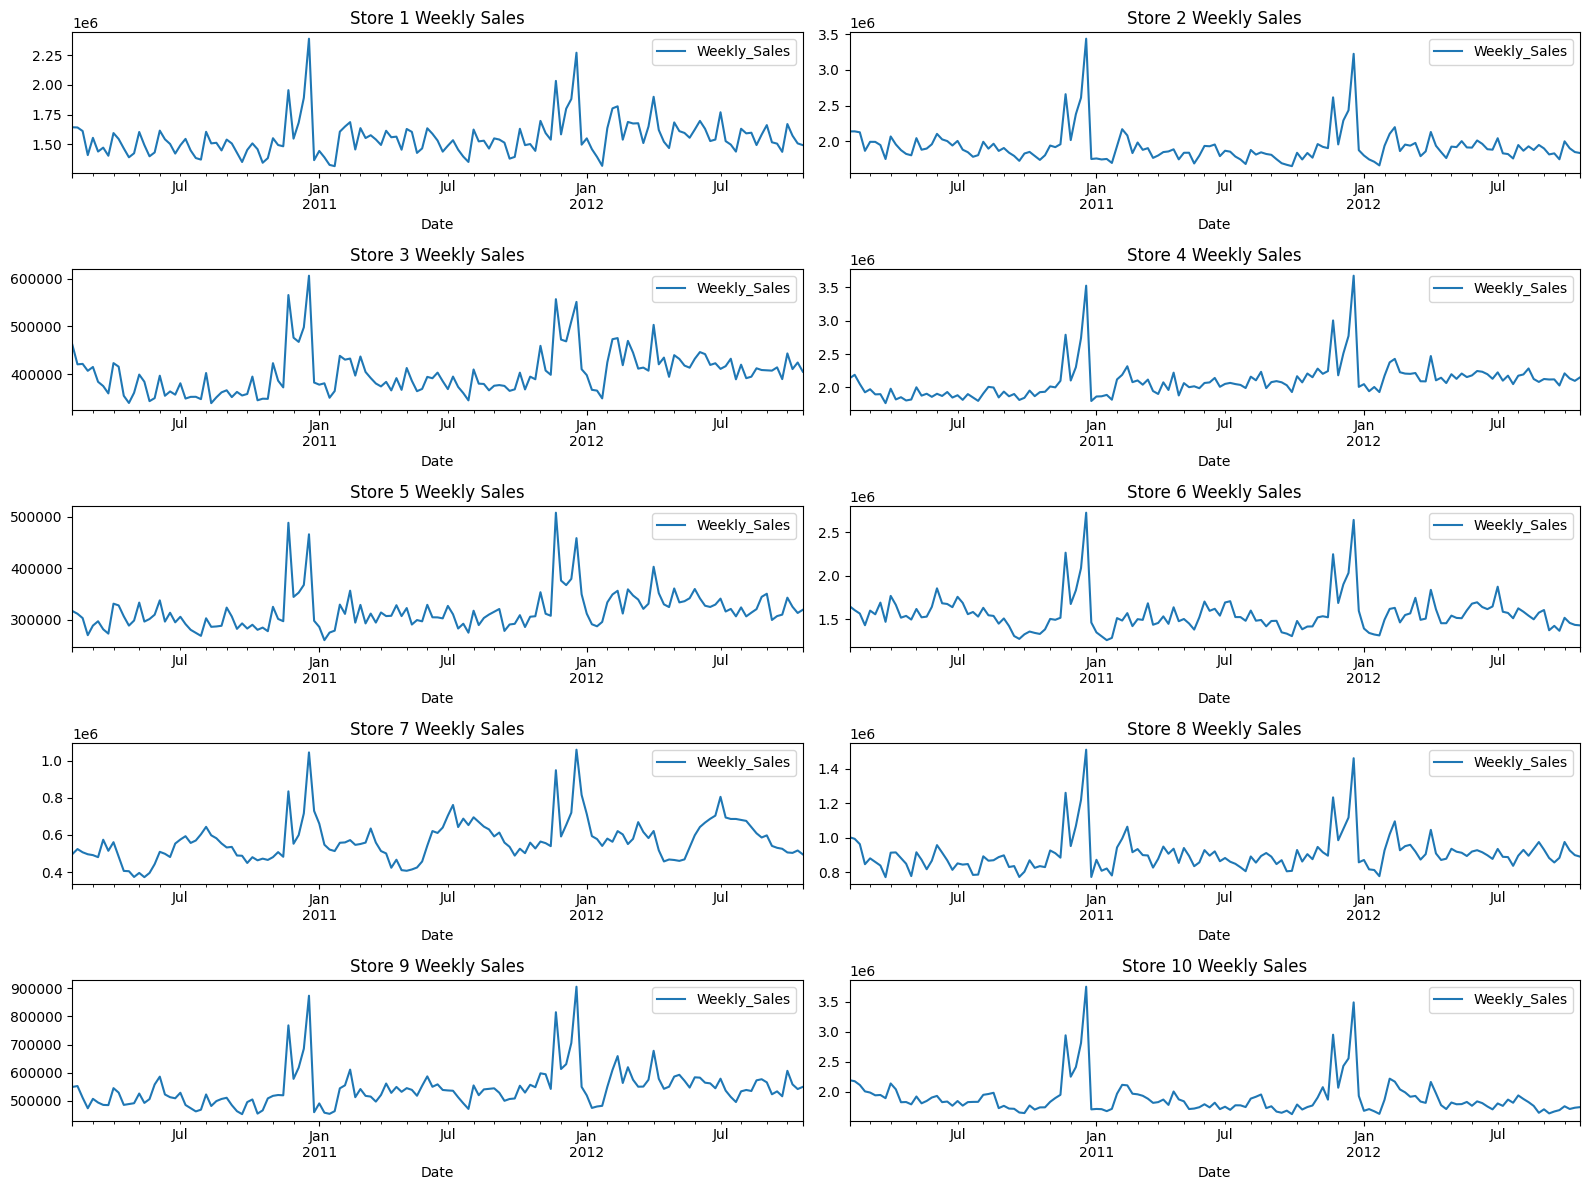

In [143]:
# Get the store IDs for first 10 stores
store_ids = data['Store'].unique()[:10]

# Create subplots with a specified number of rows and columns
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(16,12))

# Plot each variable against the "Date" column for each store ID
for i, store_id in enumerate(store_ids):
    store_data = data[data['Store'] == store_id]
    
    row = i // 2
    col = i % 2

    store_data.plot(x='Date', y='Weekly_Sales', ax=ax[row,col], title=f'Store {store_id} Weekly Sales')

# Adjust the subplot layout
plt.tight_layout()

# Display the plot
plt.show()


# Your Turn

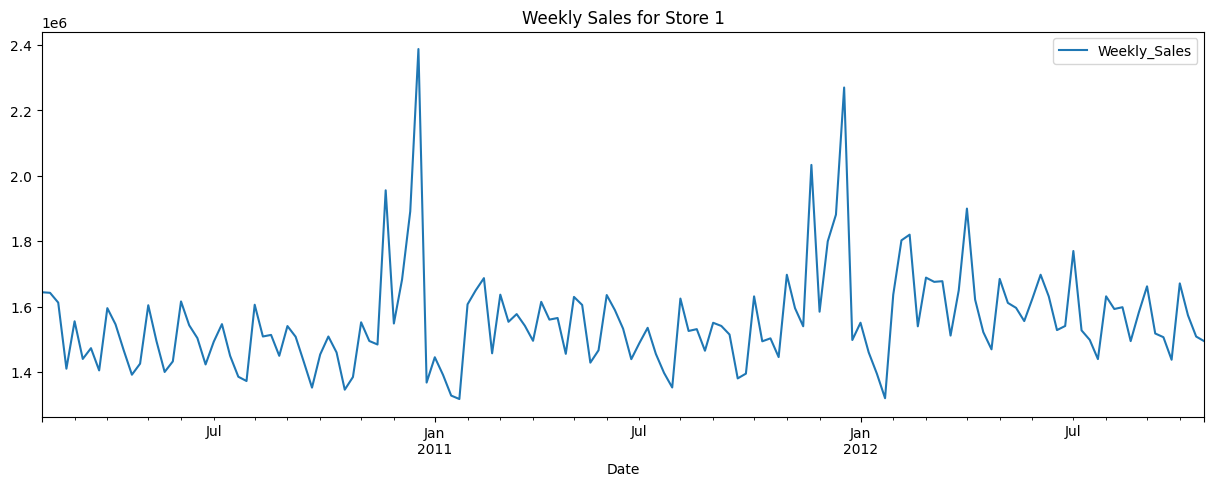

In [144]:
# Select data for a single store using store_id
gp_data=data[data['Store']==1]
# set the figure size (use figsize parameter)
fig, ax = plt.subplots(figsize=(15,5))

gp_data.plot(x='Date', y='Weekly_Sales',title='Weekly Sales for Store 1', ax= ax)

# display the plot
plt.show()


# Check data integrity

### How Many record Per every Store ? 
### Is the flag column correct ? 

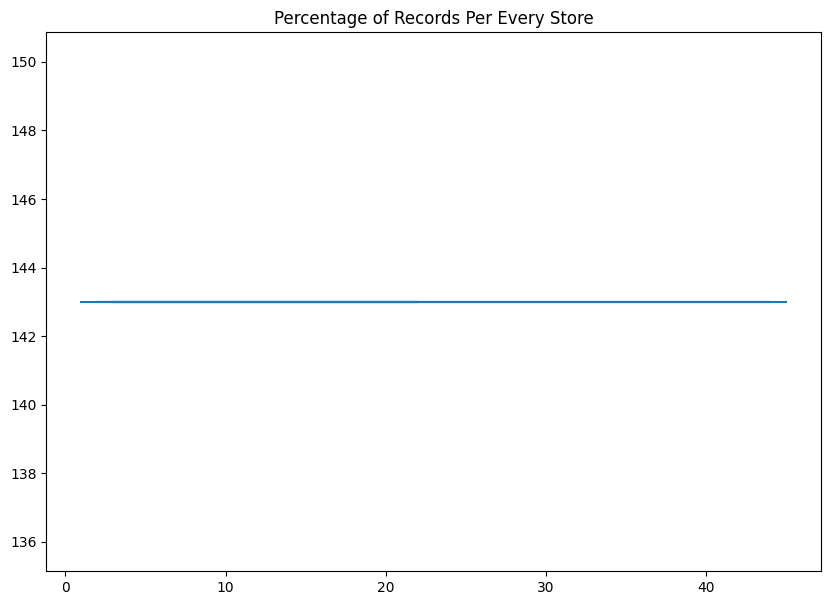

In [145]:
# set the figure size
plt.figure(figsize =(10, 7))
#check value count
data['Store'].value_counts().plot(kind='line')
plt.title('Percentage of Records Per Every Store')
plt.show()

### Explore Holiday_Flag Column and make sure that has correct values

Holiday Events in the Week
1. Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12
2. Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12
3. Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12
4. Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12

In [146]:
holidays_list=['2010-02-12','2011-02-11','2012-02-10'
              ,'2010-09-10','2011-09-09','2012-09-07'
              ,'2010-11-26','2011-11-25','2012-11-23'
              ,'2010-12-31','2011-12-30','2012-12-28']
#Check if the flagged days are actually holidays..


df = data[data['Date'].isin(holidays_list) & (data['Holiday_Flag'] == 0) ]
df.size
# so is correct


0

### Check for outliers


In [147]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


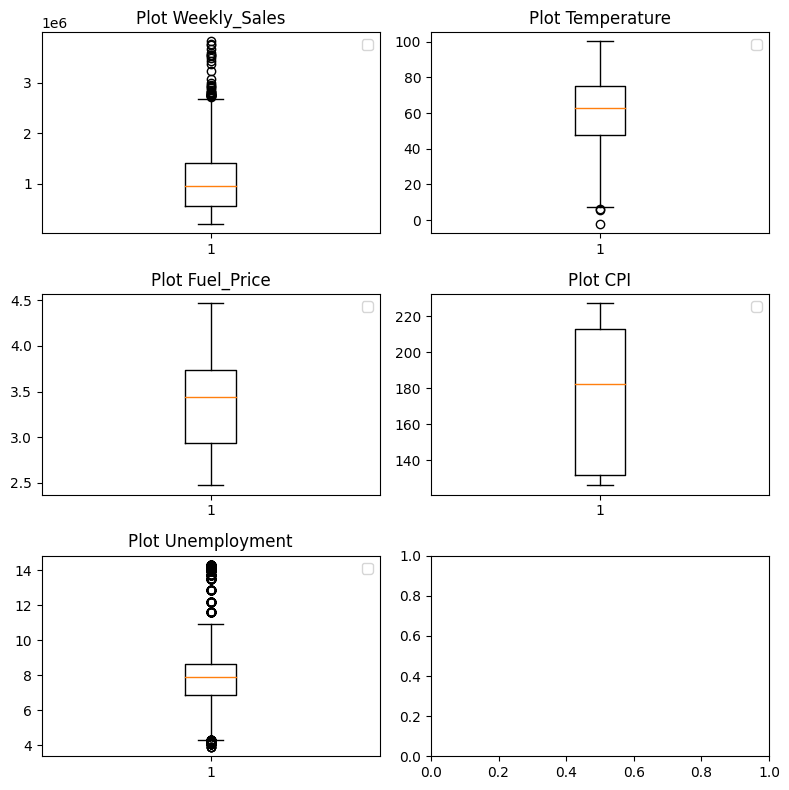

In [148]:
# Specifying the number of rows and columns for subplots
nrows = 3
ncols = 2

# Creating the subplot figure and axes
fig, ax = plt.subplots(nrows, ncols, figsize=(8,8))

# Flattening the axes array for easier iteration
ax = ax.flatten()

# Plotting the subplots


#write code for the boxplot of the rest of the variables 
cols = 'Weekly_Sales Temperature Fuel_Price CPI Unemployment'.split(' ')
for i, name in enumerate(cols):
    ax[i].boxplot(data[name])
    ax[i].set_title(f'Plot {name}')
    ax[i].legend(loc='best')

# Adjusting the subplot spacing
plt.tight_layout()

# Displaying the plot
#...

### IQR for weekly sales

In [149]:
# finding the 1st quartile
q1 = np.quantile(data['Weekly_Sales'], 0.25)

# finding the 3rd quartile
q3 = np.quantile(data['Weekly_Sales'], 0.75)
#find median
med = np.median(data['Weekly_Sales'])
#find max
max_sales= np.max(data['Weekly_Sales'])
#find min
min_sales= np.min(data['Weekly_Sales'])
# finding the iqr region (difference between third and first quartiles)
iqr = q3 - q1

# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

print('Max: ',max_sales)
print('Min: ',min_sales)
print('IQR: ',iqr)
print('Upper Bound: ',upper_bound)
print('Lower Bound: ', lower_bound)


Max:  3818686.45
Min:  209986.25
IQR:  866808.5549999999
Upper Bound:  2720371.4924999997
Lower Bound:  -746862.7275


In [150]:
#get outliers in seperate dataframe
outliers_weekly_sales=data[(data['Weekly_Sales'] >=upper_bound) | (data['Weekly_Sales'] <=lower_bound)]

In [151]:
#view the outliers
outliers_weekly_sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
189,2,2010-12-24,3436007.68,0,49.97,2.886,211.064660,8.163,2010,12,24
241,2,2011-12-23,3224369.80,0,46.66,3.112,218.999550,7.441,2011,12,23
471,4,2010-11-26,2789469.45,1,48.08,2.752,126.669267,7.127,2010,11,26
474,4,2010-12-17,2740057.14,0,46.57,2.884,126.879484,7.127,2010,12,17
475,4,2010-12-24,3526713.39,0,43.21,2.887,126.983581,7.127,2010,12,24


In [152]:
#check for number of unique values in each column
outliers_weekly_sales.nunique()

Store            9
Date             7
Weekly_Sales    34
Holiday_Flag     2
Temperature     33
Fuel_Price      29
CPI             23
Unemployment    16
Year             2
Month            2
Day              7
dtype: int64

In [153]:
#check the stores that had the outlier values
outliers_weekly_sales.Store.unique()

array([ 2,  4,  6, 10, 13, 14, 20, 23, 27], dtype=int64)

In [154]:
#check the months that had the outlier values
#...
pd.DatetimeIndex(outliers_weekly_sales.Date).month.unique()


Int64Index([12, 11], dtype='int64', name='Date')

### IQR for temperature

In [155]:
# finding the 1st quartile
q1 = np.quantile(data['Temperature'], 0.25)
# finding the 3rd quartile
q3 = np.quantile(data['Temperature'], 0.75)
# finding the iqr region
iqr = q3-q1

# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)


In [156]:
#get outliers in seperate dataframe
outliers_Temperature = data[(data['Temperature'] >= upper_bound) | (data['Temperature'] <= lower_bound)]
outliers_Temperature.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
910,7,2011-02-04,558027.77,0,-2.06,3.011,191.762589,8.818,2011,2,4
2336,17,2011-01-07,1083071.14,0,6.23,2.891,127.191774,6.866,2011,1,7
3626,26,2011-01-28,817485.14,0,5.54,3.243,133.105968,7.907,2011,1,28


### IQR for Unemployment Rate

In [157]:
# finding the 1st quartile
q1 = np.quantile(data['Unemployment'], 0.25)

# finding the 3rd quartile
q3 = np.quantile(data['Unemployment'], 0.75)

# finding the iqr region
iqr = q3-q1

# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
unemployment_outliers=data[(data["Unemployment"]>=upper_bound)|(data["Unemployment"]<=lower_bound)]
unemployment_outliers.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
555,4,2012-07-06,2224499.28,0,80.37,3.187,130.719633,4.077,2012,7,6
556,4,2012-07-13,2100252.61,0,76.86,3.224,130.683000,4.077,2012,7,13
557,4,2012-07-20,2175563.69,0,79.14,3.263,130.701290,4.077,2012,7,20
558,4,2012-07-27,2048613.65,0,81.06,3.356,130.719581,4.077,2012,7,27
559,4,2012-08-03,2174514.13,0,83.86,3.374,130.737871,4.077,2012,8,3


### Find Correlations Between Numerical Columns

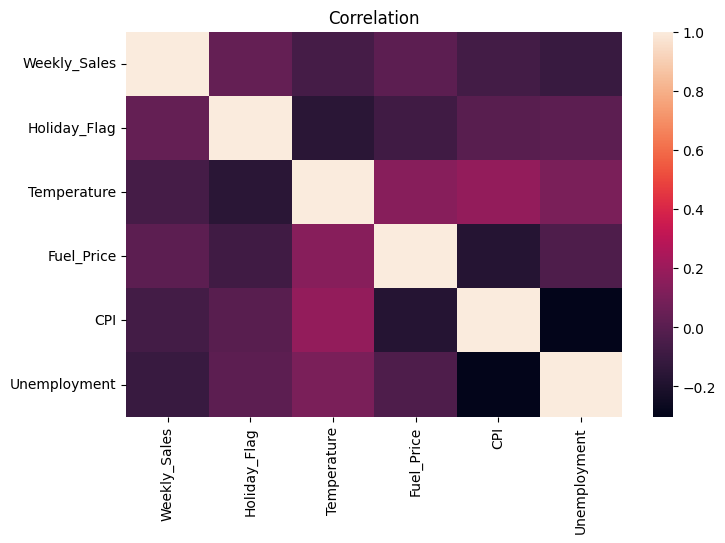

In [158]:
# create a list with all the columns of interest ex: all numerical columns
columns='Weekly_Sales Holiday_Flag Temperature Fuel_Price CPI Unemployment'.split(' ') #...
#call the corr() function to create correlation matrix
tmp= data[columns] #...

# Create a subplot figure with a specified size
fig, ax = plt.subplots(figsize=(8, 5))

# Create a heatmap of the correlation matrix using Seaborn
sns.heatmap(tmp.corr())

# Set the title of the plot
ax.set_title("Correlation")

# Set the labels for the x-axis and y-axis

ax.set_xticklabels(columns) #...
ax.set_yticklabels(columns) #...

# Display the plot
plt.show()


### Inspect relation Between Unemployement and Sales

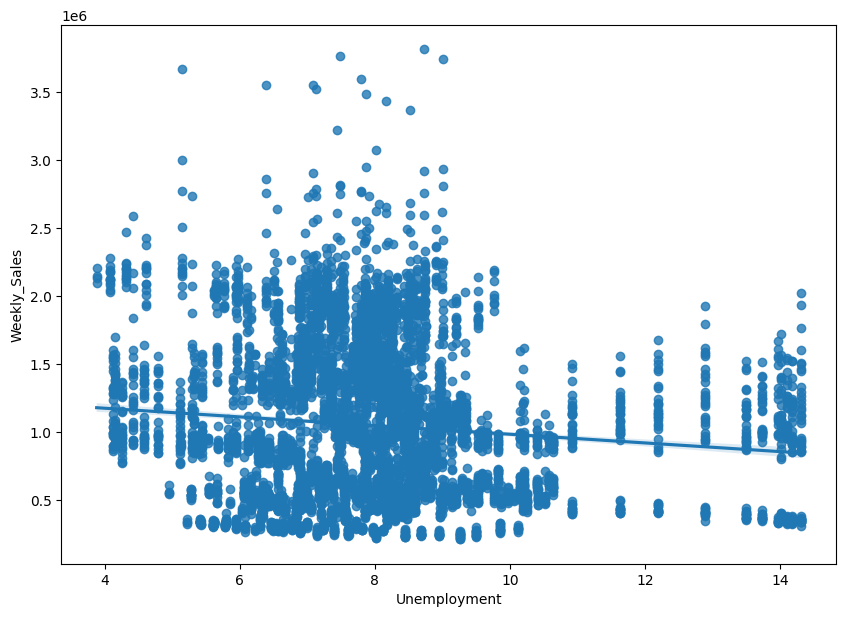

In [159]:
plt.figure(figsize =(10, 7))

# call regplot function from seaborn library to create scatter plot with regression line
sns.regplot(x = 'Unemployment', y = 'Weekly_Sales', data = data)

#display plot
plt.show()

In [160]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5


### Inspect sales for different years

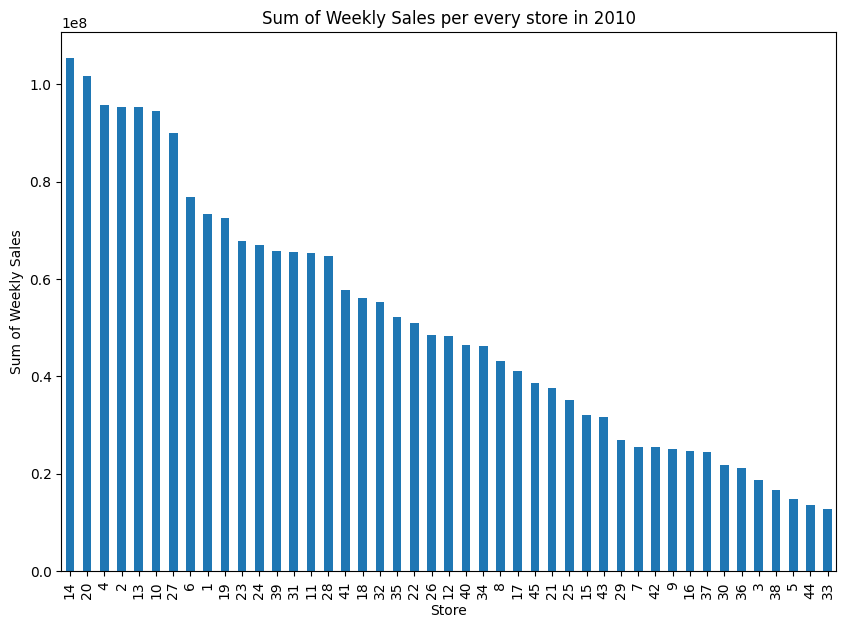

In [161]:
# Set the year of interest
year = 2010

# Create a figure with a specified size
plt.figure(figsize=(10, 7))

# Filter the data to only include the specified year
gp_data = data[data['Year'] == year]

# Group the data by store and sum the weekly sales for each store
sales_per_store = gp_data.groupby('Store')["Weekly_Sales"].sum()

# Plot the sum of weekly sales for each store as a bar graph
sales_per_store.sort_values(ascending=False).plot(kind='bar')

# Add y-axis label
plt.ylabel('Sum of Weekly Sales')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Add plot title
plt.title('Sum of Weekly Sales per every store in {}'.format(year))

# Show the plot
plt.show()

### Which Month has the highest Sales 

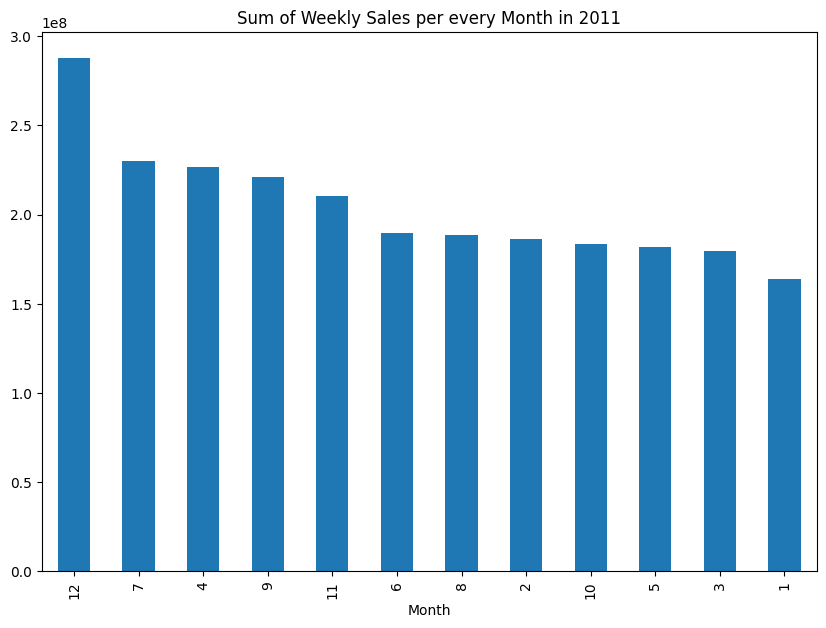

In [162]:
# Set the year of interest
year = 2011
plt.figure(figsize =(10, 7))
#choose the data of this year only
filter_data=data[data['Year']==year]
#create bar plot using seaborn library between month and sales
filter_data = filter_data.groupby('Month')["Weekly_Sales"].sum()

# Plot the sum of weekly sales for each store as a bar graph
filter_data.sort_values(ascending=False).plot(kind='bar')

#add title
plt.title('Sum of Weekly Sales per every Month in {}'.format(year))
plt.show()

# Time Series Analysis

In [163]:
from statsmodels.tsa.seasonal import seasonal_decompose

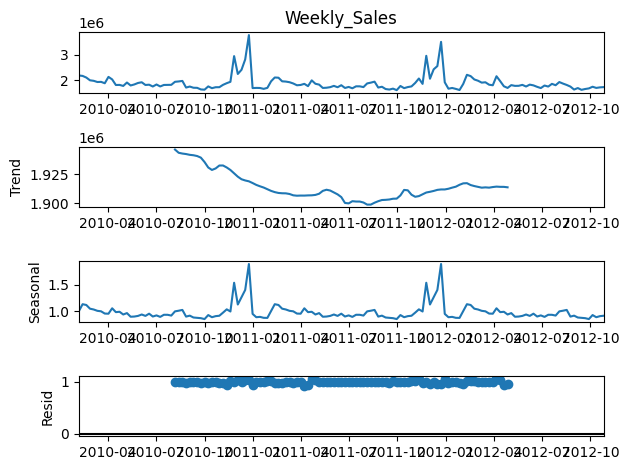

In [164]:
# Get the store IDs
store_ids = 1

# Loop over each store ID
# Filter the data for each store
store_data = data[data['Store'] == store_id].set_index('Date')['Weekly_Sales']


# Decompose the time series data for each store
result = seasonal_decompose(store_data, model='multiplicative')

# Plot the decomposed results
result.plot()

# Display the plot
plt.show()


# explain the output of the previous code: ...

# Augmented Dickey-Fuller (ADF) Test:

1. Null Hypothesis (H0 ): The series is not stationary : p−value>0.05

2. Alternate Hypothesis (Ha ): The series is stationary : p−value≤0.05

We perform these tests on our time series data and conclude that the time series is not stationary. In order to make it stationary, we need to perform Differencing(making mean constant) and Transformation(making variance constant).

In [166]:
from statsmodels.tsa.stattools import adfuller
import warnings

# loop over the data colums and call adfuller function, pass the store_data for each column and autolag='AIC' as parameters
p_vals = pd.DataFrame(index=data['Store'].unique(), columns=data.columns)

for store in data['Store'].unique():
    for col in data.columns:
        # Apply the adfuller function to the column
        store_data = data[data['Store'] == store]
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")

            result = adfuller(store_data[col], autolag='AIC', regresults=False)
            p_vals.loc[store, col] = result[1]


p_vals.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
1,NaN,1.0,0.000014,0.110398,0.000046,0.328271,0.974621,0.984262,0.814312,0.081146,0.046128
2,NaN,1.0,0.00399,0.110398,0.000136,0.328271,0.974664,0.997699,0.814312,0.081146,0.046128
3,NaN,1.0,0.038409,0.110398,0.000027,0.328271,0.974208,0.970371,0.814312,0.081146,0.046128
4,NaN,1.0,0.047799,0.110398,0.000146,0.319678,0.880477,0.620647,0.814312,0.081146,0.046128
5,NaN,1.0,0.000425,0.110398,0.000039,0.328271,0.974552,0.982577,0.814312,0.081146,0.046128


<Figure size 500x500 with 0 Axes>

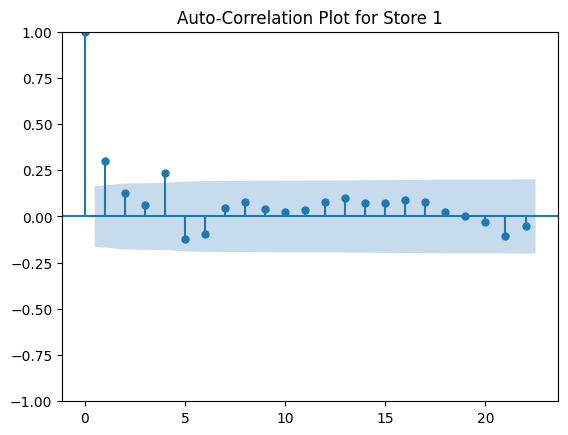

<Figure size 500x500 with 0 Axes>

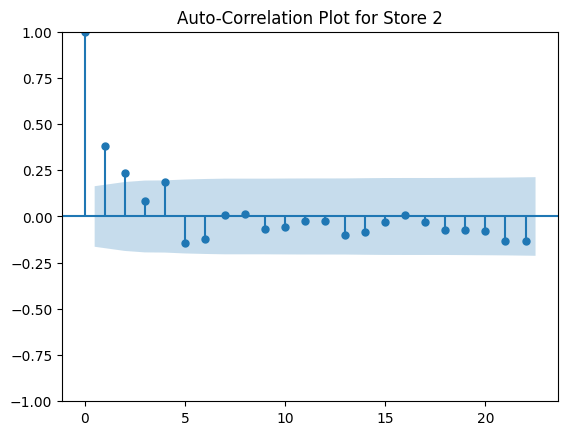

<Figure size 500x500 with 0 Axes>

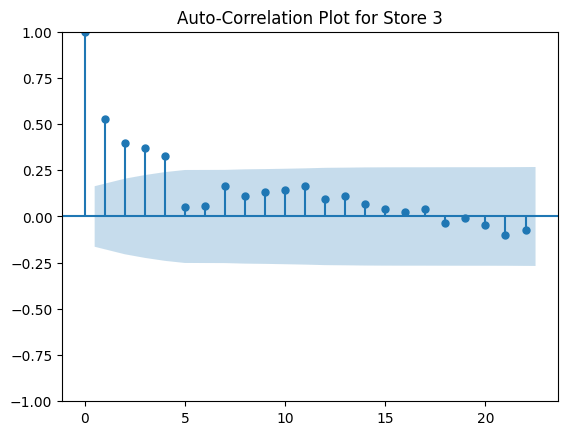

In [167]:
from statsmodels.graphics.tsaplots import plot_acf

# Filter data for the first 10 stores only
data_3_stores = data[data['Store'] <= 3]

# Group the data by store and plot the ACF for each store
for store_id in data_3_stores['Store'].unique():
    store_data = data_3_stores[data_3_stores['Store'] == store_id]['Weekly_Sales']
    plt.figure(figsize=(5, 5))
    plot_acf(store_data, title="Auto-Correlation Plot for Store {}".format(store_id))
    plt.show()


# Your Turn

<Figure size 800x800 with 0 Axes>

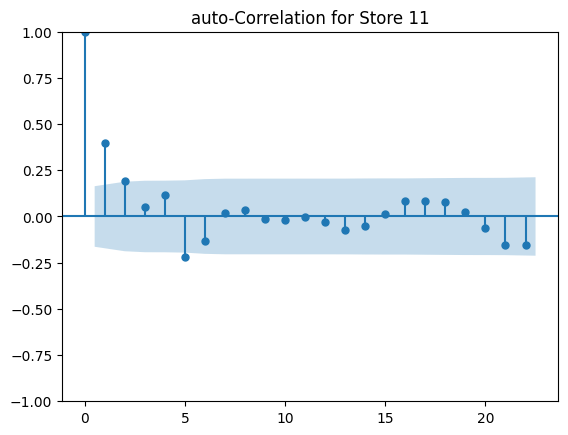

In [168]:
# Select data for a single store using store_id
gp_data=data[data['Store']==11]['Weekly_Sales']
# set the figure size
plt.figure(figsize=(8,8))
# plot acf graph
plot_acf(gp_data, title="auto-Correlation for Store 11")
#display plot
plt.show()
